In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel("/content/online_retail_II.xlsx")
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
!pip install openpyxl


In [6]:
df = pd.read_excel("/content/online_retail_II.xlsx")
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [13]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer_ID', 'Country'],
      dtype='object')

In [14]:
df = df.dropna(subset=['Customer_ID'])

df = df[~df['Invoice'].astype(str).str.startswith('C')]


In [15]:
df['TotalAmount'] = df['Quantity'] * df['Price']


In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [19]:
df['TotalAmount'] = df['Quantity'] * df['Price']

In [20]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [23]:
rfm = df.groupby('Customer_ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'count',
    'TotalAmount': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
Customer_ID,,,
12346.0,165,33,372.86
12347.0,3,71,1323.32
12348.0,74,20,222.16
12349.0,43,102,2671.14
12351.0,11,21,300.93


In [25]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])

rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'),
                         4, labels=[1,2,3,4])

rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])


In [26]:
rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Customer_ID,,,,,,,
12346.0,165,33,372.86,1,2,2,122
12347.0,3,71,1323.32,4,3,3,433
12348.0,74,20,222.16,2,2,1,221
12349.0,43,102,2671.14,3,3,4,334
12351.0,11,21,300.93,4,2,1,421


In [27]:
def segment(row):
    if row['R_Score'] == 4 and row['F_Score'] == 4:
        return 'Champions'
    elif row['F_Score'] >= 3:
        return 'Loyal'
    elif row['R_Score'] <= 2:
        return 'At Risk'
    else:
        return 'Regular'

rfm['Segment'] = rfm.apply(segment, axis=1)


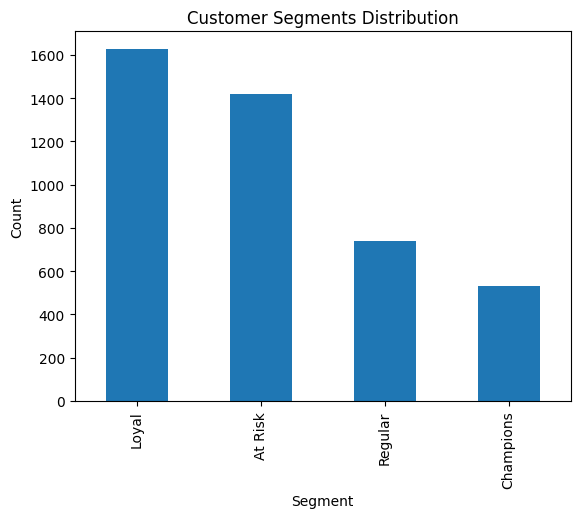

In [28]:
segment_counts = rfm['Segment'].value_counts()

plt.figure()
segment_counts.plot(kind='bar')
plt.title("Customer Segments Distribution")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()


In [29]:
rfm.to_csv("rfm_segments.csv")


In [30]:
files.download("rfm_segments.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>